In [1]:
import cv2
from matplotlib import pyplot
import numpy

%matplotlib inline

# Representação de imagens

Uma imagem digital pode ser representada através de uma matriz de pixels. Cada pixel armazena informação sobre sua cor, que pode ter várias representações. Para uma imagem em preto e branco, por exemplo, cada pixel só poderia guardar $0$ ou $1$. Já para uma imagem em tons de cinza, os valores possíveis estão no intervalo $[0, 1]$, onde esse valor representa a intensidade do pixel, variando de $0$(totalmente preto) ao $1$(totalmente branco). Para imagens coloridas, geralmente as cores são decompostas em vários canais, ou seja, agora a imagem é composta por várias matrizes de pixels onde cada matriz dessa pode ser vista como uma imagems em tons de cinza para aquele canal. A representação mais utilizada é a $RGB$ ($Red, Green, Blue$), mas existem outras como $CMYK$($Cyan, Magenta, Yellow, Kuro$). No OpenCV, a representação padrão é a $BGR$.

Observação: Os valores acima foram normalizados. Geralmente, os valores de cada canal são armazenados como números inteiros de $1\ byte$ ($0$ a $255$), mas também podem ser armazedados como números reais ($[0, 1]$).  

Curiosidade: O canal $K$ do formato $CMYK$ representa o preto. A letra $K$ é utilizada no lugar do $B$ ($Black$) para não ser confundida com azul ($Blue$). Coincidência ou não, kuro é preto em japônes.

## Exercício
1. Considere uma imagem $RGB$ com $8\ bits$ por canal. Qual a quantidade máxima de cores que poderiam ser mostradas nessa imagem?  

2. Se quiséssemos limitar a imagem a apenas $64$ cores, quantos $bits$ precisaríamos para cada canal? Quais benefícios isso poderia trazer?

# Operações básicas

## Carregar imagens

O carregamento de imagens é feito com a função <code>imread(caminho do arquivo, flags)</code>, onde o caminho do arquivo pode ser relativo) e <code>flags</code> pode ser usado para alterar a forma que a imagem vai ser carregada (ex.: <code>cv2.IMREAD_GRAYSCALE</code> para carregar em preto e branco, <code>cv2.IMREAD_UNCHANGED</code> para carregar todos os canais etc). Por padrão a imagem é carregada no formato BGR. Caso a imagem não possa ser carregada a função retorna <code>None</code>. Obs.: o caminho do arquivo não pode conter caracteres especiais como por exemplo ã, é etc.

In [2]:
lenna = cv2.imread('lenna.png')
lenna is None

False

Podemos checar o valor de um pixel através de suas coordenadas (a origem fica no topo esquerdo da imagem)

In [3]:
lenna[0][0]

array([125, 137, 226], dtype=uint8)

Ou também podemos checar a intensidade de um canal específico de um pixel

In [4]:
print('Blue: {}, Green: {}, Red: {}'.format(lenna[0][0][0], lenna[0][0][1], lenna[0][0][2]))

Blue: 125, Green: 137, Red: 226


## Exibir imagens

Para exibir a imagem, utilizamos a função <code>cv2.imshow(nome da janela, imagem)</code>. O nome da janela é usado para identificarmos qual em qual janela a imagem será mostrada. Caso a não haja nenhuma janela aberta com esse nome, ela será criada. Caso contrário, o conteúdo da janela será substituído pela imagem. Isso é útil quando quisermos exibir várias imagens de simultaneamente ou mostrar uma sequência de imagens sem criar uma janela para cada quadro. Após chamar <code>cv2.imshow</code>, **sempre** devemos chamar <code>cv2.waitKey(milisegundos)</code> para que a imagem seja mostrada e o programa não trave. <code>cv2.waitKey</code> recebe como parâmetro o tempo em milisegundos que a janela ficará aberta enquanto o usuário não apertar nehuma tecla do teclado. Use <code>cv2.waitKey(0)</code> para esperar indefinidamente.

In [5]:
cv2.imshow('Lenna', lenna)
cv2.waitKey(0)
cv2.destroyAllWindows() # no notebook precisamos destruir a janela explicitamente

Ou podemos usar o módulo <code>pyplot</code> do pacote <code>matplotlib</code> e plotar a imagem como se fosse um gráfico

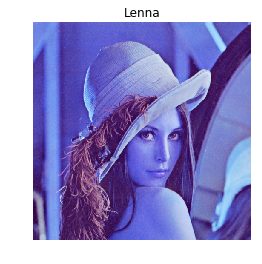

In [85]:
pyplot.imshow(lenna)
pyplot.title('Lenna')
pyplot.axis('off')
pyplot.show()

### Exercício
1. Por que a imagem ficou azulada?

## Conversão entre representações

Para converter uma imagem para uma determinda representação usamos a função <code>cv2.cvtColor(imagem, representação)</code>, onde <code>representação</code> pode ser:
* cv2.COLOR_BGR2RGB
* cv2.COLOR_BGR2GRAY
* cv2.COLOR_BGR2HSV
* etc  

Exemplos:

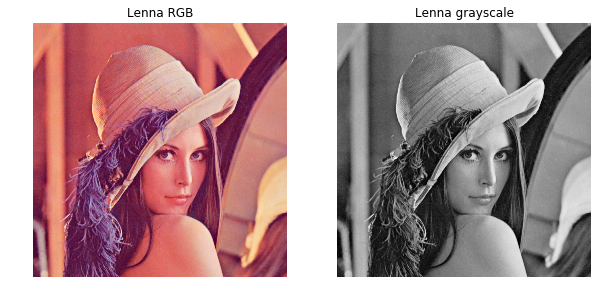

In [88]:
lenna_rgb = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)
lenna_gray = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)

rows = 1
cols = 2
figsize = (10, 5)
figure, axis = pyplot.subplots(rows, cols, figsize=figsize)

axis[0].imshow(lenna_rgb)
axis[0].title.set_text('Lenna RGB')
axis[0].axis('off')
    
axis[1].imshow(lenna_gray, cmap='gray') # com o pyplot precisamos forçar que a imagem fique em tons de cinza com o parametro cmap
axis[1].title.set_text('Lenna grayscale')
axis[1].axis('off')

pyplot.show()

Podemos mostrar canais específicos, utilizando <code>numpy</code> slicing:

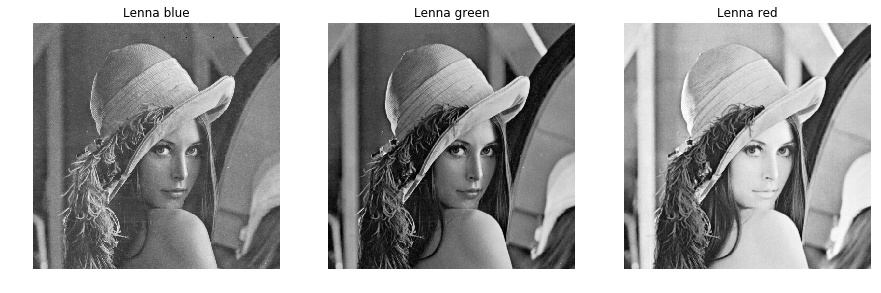

In [89]:
lenna_blue = lenna[:, :, 0]
lenna_green = lenna[:, :, 1]
lenna_red = lenna[:, :, 2]

rows = 1
cols = 3
figure, axis = pyplot.subplots(rows, cols, figsize=(15, 5)) # as imagems serão exibidas em uma linha e três colunas


for i, (channel, channel_name) in enumerate([(lenna_blue, 'blue'), (lenna_green, 'green'), (lenna_red, 'red')]):
    axis[i].imshow(channel, cmap='gray')
    axis[i].title.set_text('Lenna {}'.format(channel_name))
    axis[i].axis('off')

pyplot.show()

Cada imagem acima representa a intensidade de cada canal, por pixel. Observe que a última imagem é mais clara qua as outras.

### Exercício
1. Observando as imagens acima, por que a última imagem é mais clara que as outras? Por que apenas na primeira o cabelo da mulher é mais claro, enquanto nas outras é mais escuro?
2. Tente gerar uma imagem colorida que represente cada canal. Ex.: para o canal blue apenas a tonalidade do azul de cada pixel deve ser mostrada

## Salvar imagens
Para salvar imagens usamos a função <code>cv2.imwrite(nome do arquivo, imagem)</code>

In [48]:
cv2.imwrite('lenna_grayscale.png', lenna_gray)

True

# Outras operações

## Binarização
Como mostramos acima, podemos converter uma imagem para escala de cinza através da função <code>cv2.cvtColor</code>. No entanto, há situações em que precisamos de imagens em preto e branco (binárias). Podemos obter uma imagem binária a partir de uma imagem em escala de cinza tomando um valor ($threshold$) que separe os pixels entre brancos ($255 ou 1.0$) e preto($0$). Ex.: se o limite for 127, todos os pixels com valor menor que 127 serão pretos e todos com valor igual ou maior que 127 serão brancos.

In [90]:
def binariza(imagem):
    binaria = numpy.zeros(imagem.shape) # podemos criar "imagens" no código com matrizes
    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            if imagem[i][j] >= 127:
                binaria[i][j] = 255
            else:
                binaria[i][j] = 0
    return binaria

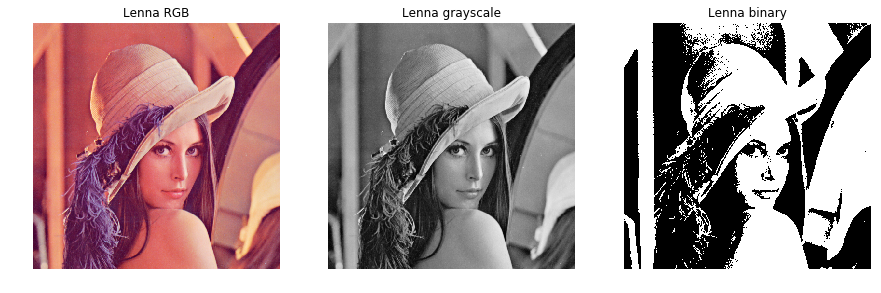

In [91]:
lenna_binary = binariza(lenna_gray)
cv2.imwrite('lenna_binary.png', lenna_binary)

figure, axis = pyplot.subplots(1, 3, figsize=(15, 5))

axis[0].imshow(cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB))
axis[0].title.set_text('Lenna RGB')
axis[0].axis('off')

axis[1].imshow(lenna_gray, cmap='gray')
axis[1].title.set_text('Lenna grayscale')
axis[1].axis('off')

axis[2].imshow(lenna_binary, cmap='gray')
axis[2].title.set_text('Lenna binary')
axis[2].axis('off')

pyplot.show()

### Exercício
1. Na função <code>binariza</code> criamos uma imagem com uma matriz. Se essa imagem fosse plotada, qual seria o resultado?
2. Modifique a função <code>binariza</code> para que o limiar ($threshold$) e o valor do pixel caso passe desse limiar sejam passadas como parâmetros.
3. Gere as imagens binárias para os seguintes limiares: 0, 63, 127, 195, 255 e compare os resultados.
4. Melhore o desempenho da função <code>binariza</code> substituindo os $loops$ por $slicing$.

## Máscaras
No processamento de imagens, muitas vezes uma imagem contém informações que não são importantes para a resolução do problema. Para remover essa informação podemos usar uma máscara binária.

In [77]:
def aplica_mascara(imagem, mascara):
    resultado = numpy.zeros(imagem.shape, dtype=numpy.uint8)
    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            if mascara[i][j] > 0:
                resultado[i][j][0] = imagem[i][j][0]
                resultado[i][j][1] = imagem[i][j][1]
                resultado[i][j][2] = imagem[i][j][2]
            else:
                resultado[i][j][0] = 0
                resultado[i][j][1] = 0
                resultado[i][j][2] = 0
    
    return resultado

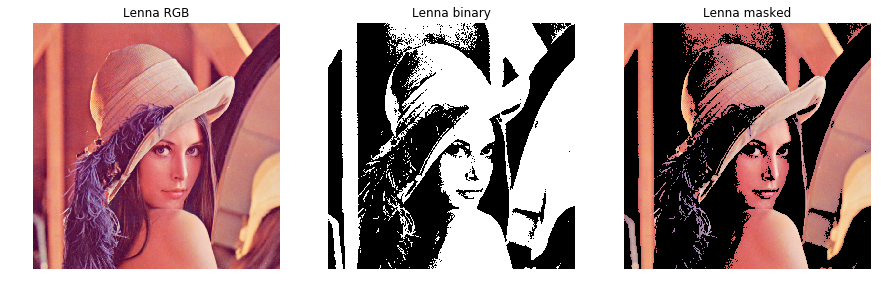

In [92]:
lenna_masked = aplica_mascara(lenna, lenna_binary)

figure, axis = pyplot.subplots(1, 3, figsize=(15, 5))

axis[0].imshow(cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB))
axis[0].title.set_text('Lenna RGB')
axis[0].axis('off')

axis[1].imshow(lenna_binary, cmap='gray')
axis[1].title.set_text('Lenna binary')
axis[1].axis('off')

axis[2].imshow(cv2.cvtColor(lenna_masked, cv2.COLOR_BGR2RGB))
axis[2].title.set_text('Lenna masked')
axis[2].axis('off')

pyplot.show()

### Exrecício
1. Em relação aos argumentos <code>imagem</code> e <code>mascara</code>, quais as condições necessárias para que a função <code>aplica_mascara</code> funcione?
2. Melhore o desempenho da função <code>aplica_mascara</code> substituindo os $loops$ por $slicing$.